# 4th Practice - Datasets 2
## Particle Physics Event Classification Dataset
https://www.kaggle.com/datasets/younusmohamed/particle-physics-event-classification-dataset

### Dataset Description
Accurately separating rare signal (s) events from abundant background (b) is central to particle physics. This dataset provides reconstructed kinematic features per event, along with a per-event Weight to reflect experimental importance. The task is binary classification: predict whether an event is signal (s) or background (b).

### Explicación del Problema

Este dataset trata sobre **clasificación binaria en física de partículas**. El objetivo es distinguir entre dos tipos de eventos que ocurren cuando las partículas colisionan en aceleradores como el Gran Colisionador de Hadrones (LHC):

- **Señal (s)**: Eventos raros e interesantes que los físicos buscan activamente
- **Fondo (b)**: Eventos comunes que "contaminan" los datos y dificultan encontrar la señal

**La analogía simple**: Imagina que estás buscando una aguja (señal) en un pajar (fondo). Los eventos de fondo son muchísimo más abundantes que los de señal, lo que hace este un problema de clasificación desbalanceado.

### Descripción de las Columnas

#### Columnas Administrativas (3)

1. **EventId**: Identificador único de cada evento
2. **Weight**: Peso estadístico del evento (importancia experimental)
3. **Label**: Variable objetivo - 's' para señal, 'b' para fondo

#### Características del Dataset (30)

Las características se dividen en dos categorías según su prefijo:

##### **DER_*** (13 columnas) - Variables Derivadas
Calculadas a partir de las mediciones primarias, combinando información de múltiples partículas:

4. **DER_mass_MMC**: Masa del bosón de Higgs estimada usando el "Missing Mass Calculator" (técnica avanzada de reconstrucción)
5. **DER_mass_transverse_met_lep**: Masa transversal del sistema leptón + energía faltante
6. **DER_mass_vis**: Masa visible - calculada solo con las partículas que se ven directamente
7. **DER_pt_h**: Momentum transversal del sistema completo (candidato a Higgs)
8. **DER_deltaeta_jet_jet**: Diferencia en eta (ángulo) entre los dos jets principales
9. **DER_mass_jet_jet**: Masa invariante del sistema de dos jets combinados
10. **DER_prodeta_jet_jet**: Producto de las etas de los dos jets (indica si están en lados opuestos del detector)
11. **DER_deltar_tau_lep**: Distancia angular entre el tau y el leptón
12. **DER_pt_tot**: Momentum transversal total del evento
13. **DER_sum_pt**: Suma de los momentums transversales de todas las partículas
14. **DER_pt_ratio_lep_tau**: Razón entre el pT del leptón y el pT del tau
15. **DER_met_phi_centrality**: Centralidad del ángulo phi de la energía faltante
16. **DER_lep_eta_centrality**: Centralidad de la eta del leptón respecto a los jets

##### **PRI_*** (17 columnas) - Variables Primitivas
Mediciones directas del detector:

###### Variables del Tau (partícula pesada similar al electrón)
17. **PRI_tau_pt**: Momentum transversal del tau
18. **PRI_tau_eta**: Pseudorapidez del tau (ángulo)
19. **PRI_tau_phi**: Ángulo azimutal del tau

###### Variables del Leptón (electrón o muón)
20. **PRI_lep_pt**: Momentum transversal del leptón
21. **PRI_lep_eta**: Pseudorapidez del leptón
22. **PRI_lep_phi**: Ángulo azimutal del leptón

###### Variables de Energía Faltante (MET - Missing Energy Transverse)
Energía que "desaparece" porque partículas invisibles (neutrinos) se escapan sin ser detectadas:

23. **PRI_met**: Magnitud de la energía faltante
24. **PRI_met_phi**: Dirección de la energía faltante
25. **PRI_met_sumet**: Suma escalar de toda la energía transversal

###### Variables de Jets
26. **PRI_jet_num**: Número de jets detectados (0, 1, 2, 3+)

**Jet líder** (el más energético):
27. **PRI_jet_leading_pt**: Momentum transversal del jet principal
28. **PRI_jet_leading_eta**: Pseudorapidez del jet principal
29. **PRI_jet_leading_phi**: Ángulo azimutal del jet principal

**Jet subleader** (el segundo más energético):
30. **PRI_jet_subleading_pt**: Momentum transversal del segundo jet
31. **PRI_jet_subleading_eta**: Pseudorapidez del segundo jet
32. **PRI_jet_subleading_phi**: Ángulo azimutal del segundo jet

33. **PRI_jet_all_pt**: Suma de los pT de todos los jets

###### Anotaciones
- **pT (momentum transversal)**: "Qué tan rápido" se mueve una partícula perpendicular al haz
- **eta (pseudorapidez)**: "En qué dirección" va la partícula (valores cercanos a 0 = perpendicular al haz, valores altos = paralelo al haz)
- **phi (ángulo azimutal)**: Dirección en el plano circular perpendicular al haz (como las manecillas del reloj)
- **masa invariante**: Combinación matemática de energía y momentum que revela la masa de la partícula "madre" que se desintegró



In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = './Particle_Physics_Event _Classification.csv'
df = pd.read_csv(data)

#### Exploratory data analysis

In [4]:
print(f"Dataframe events: {df.shape[0]}")
print(f"Dataframe features: {df.shape[1]}")

Dataframe events: 250000
Dataframe features: 33


In [5]:
display(df.head())

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [6]:
col_names = df.columns
display(col_names)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [8]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [9]:
df['Label'].isna().sum()

0

No hay ningún evento con la característica objetivo sin definir

In [10]:
print(df['Label'].unique())

['s' 'b']


Existen solo dos clases: signal (s) y background (b)

In [11]:
df['Label'].value_counts(normalize=False)

Label
b    164333
s     85667
Name: count, dtype: int64

Existe cierto desbalance entre clases

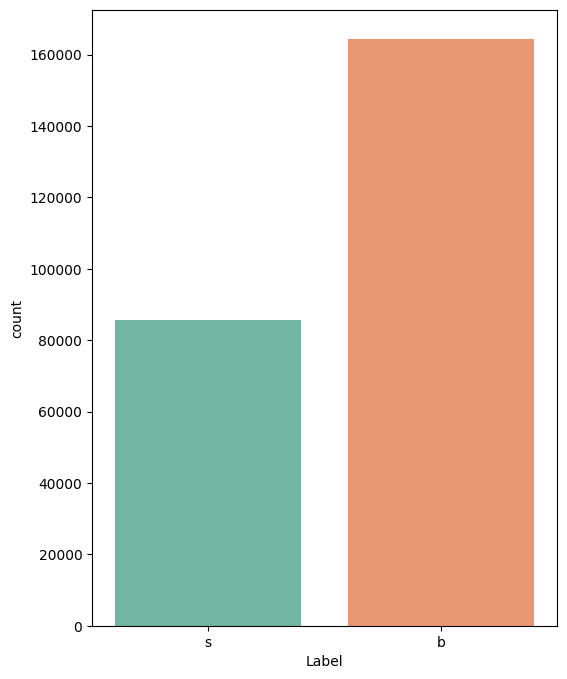

In [12]:
plt.figure(figsize=(6,8))
sns.countplot(x="Label", data=df, palette="Set2")
plt.show()

El desbalance es evidente, sin embargo, alineado con lo esperado por la naturaleza del fenómeno físico que se busca clasificar

### Categorical variable analysis

In [13]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print(f"{len(categorical)} categorical variables in the dataset.")
display(categorical)

1 categorical variables in the dataset.


['Label']

La única variable categórica es la variable objetivo misma, **no es necesario realizar conversiones numéricas fuera de esto**

### One-hot codification for Label (target) feature

In [14]:
pd.get_dummies(df.Label, drop_first=True).head()

,s
0,True
1,False
2,False
3,False
4,False


In [15]:
df['Label'] = (df['Label'] == 's').astype(int)
df['Label'].head()

0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int32

### Numerical variable analysis
Note: Some physics datasets encode “not available” values as -999. If you find such sentinels, treat them as missing and impute appropriately.

**Se tratará a los valores -999 como nan para evitar errores en la distribución de las variables numericas**

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')


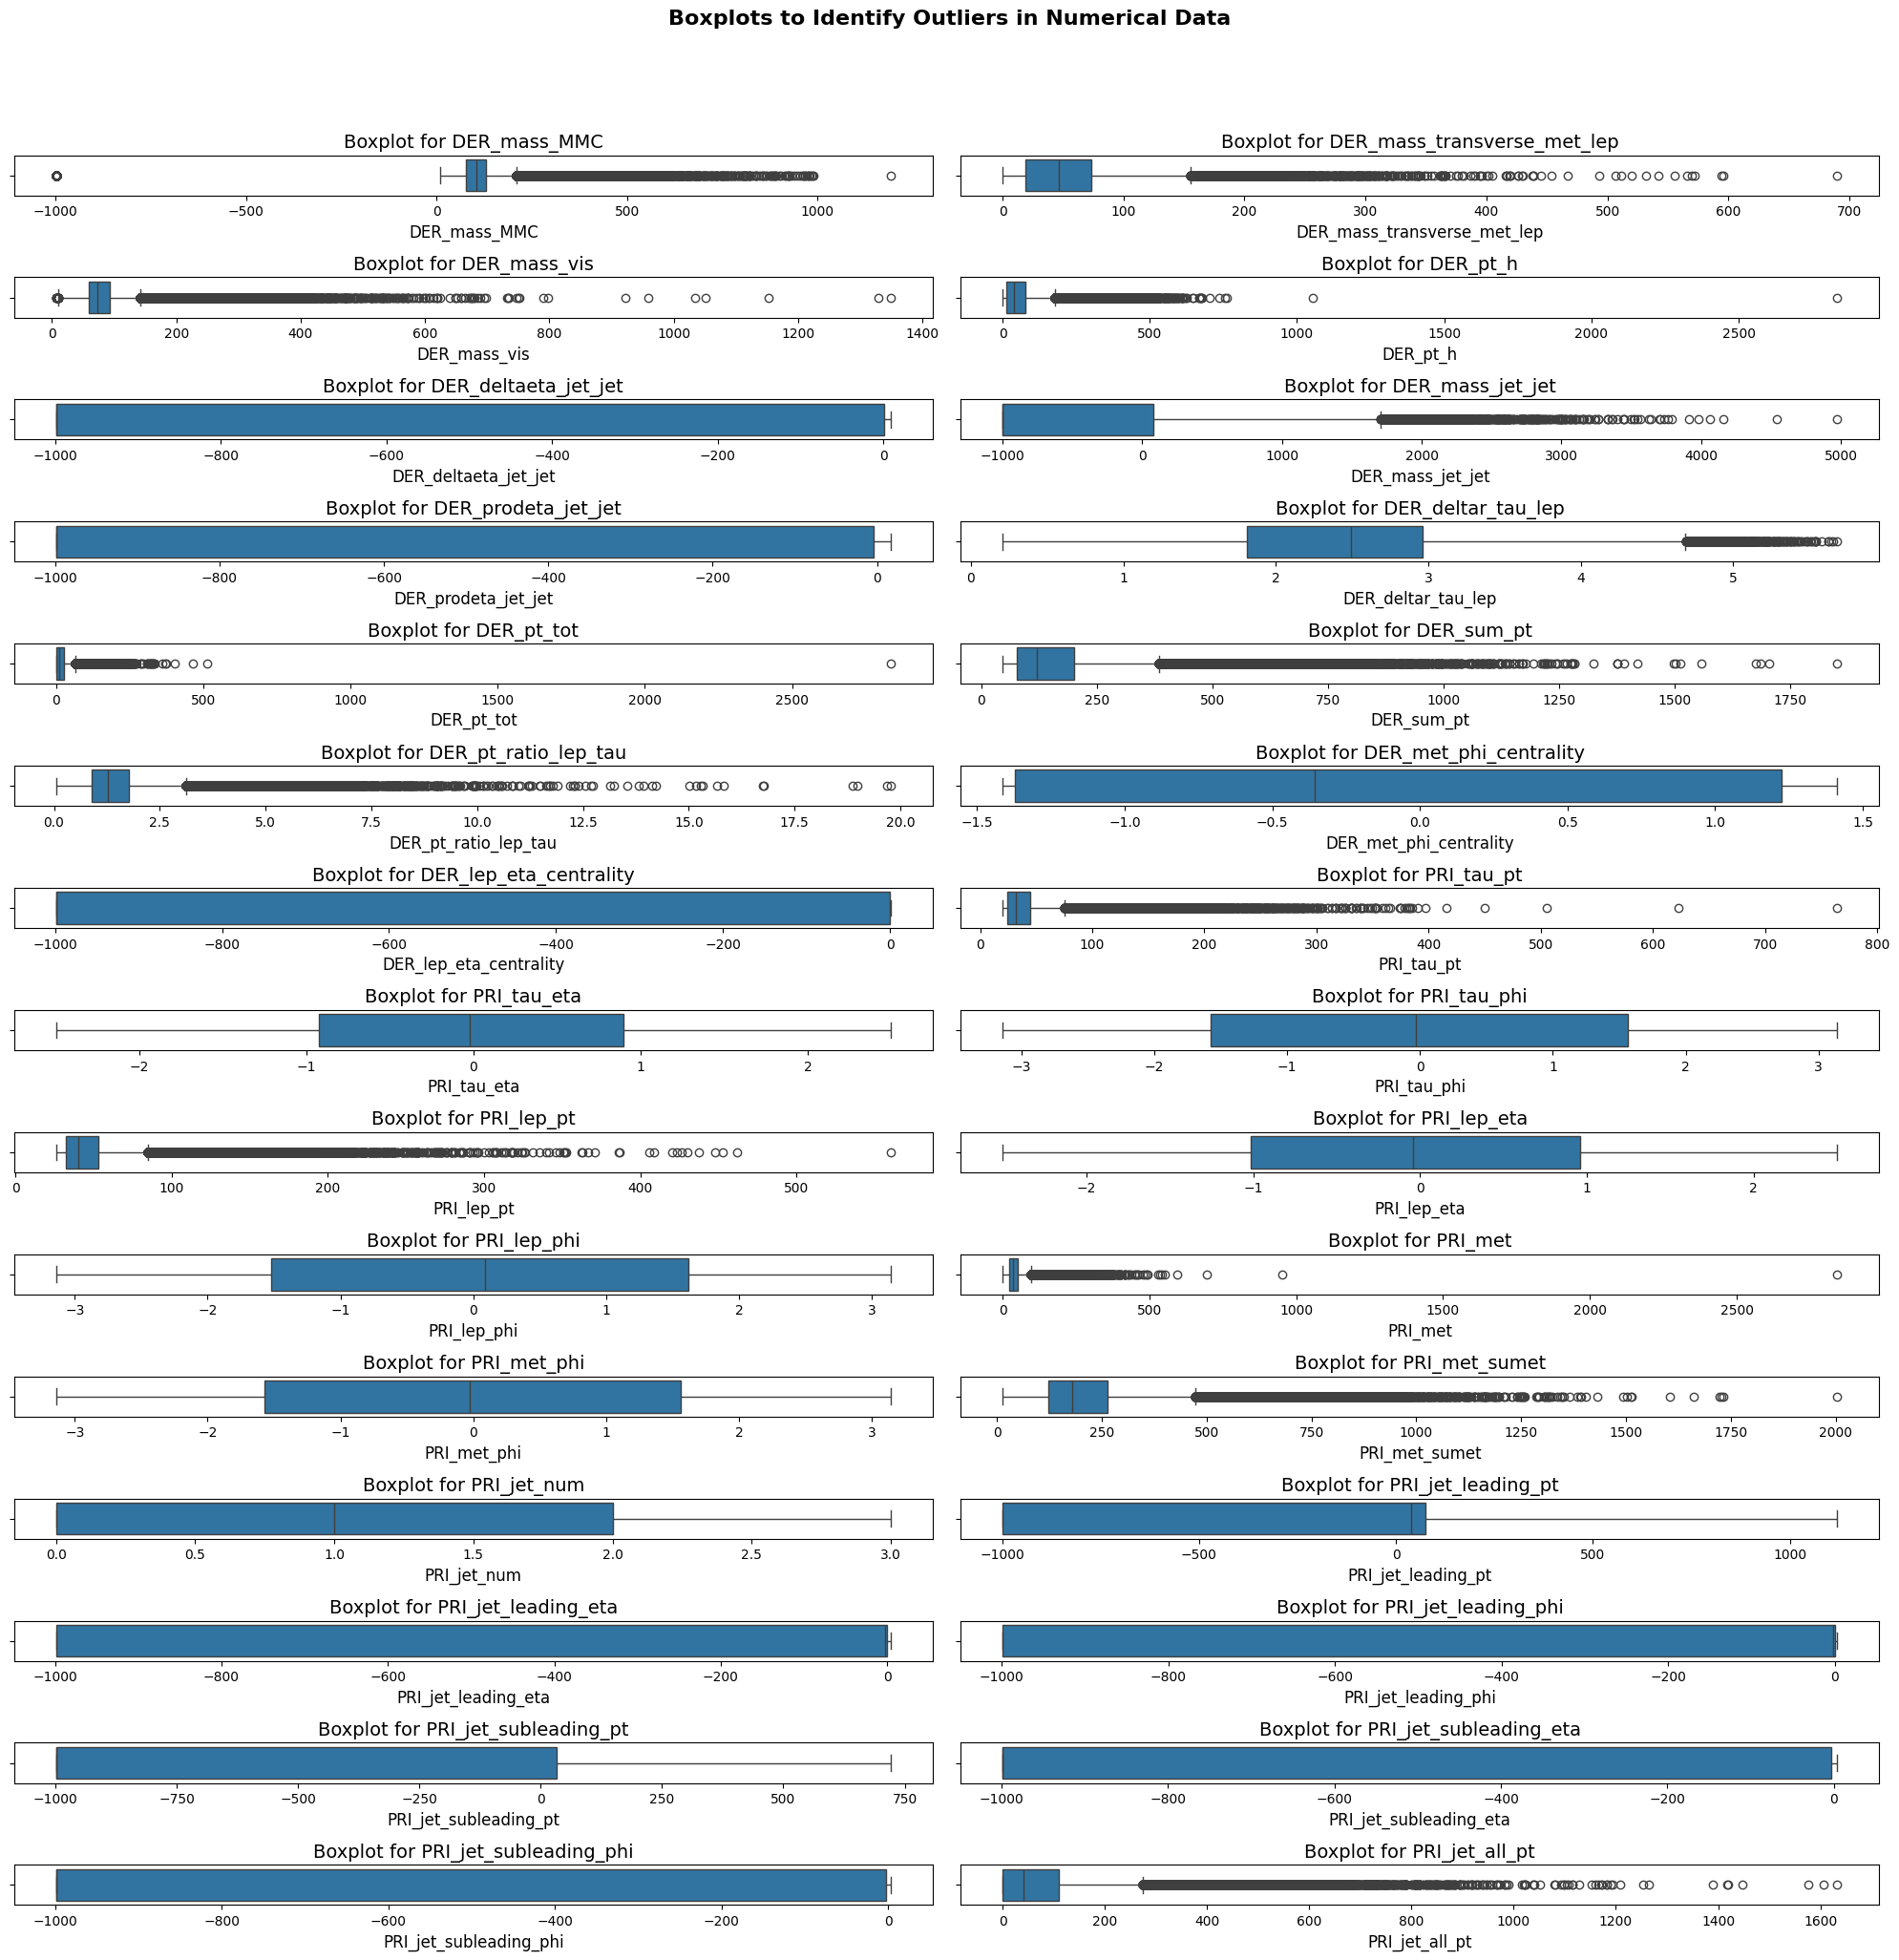

In [16]:
numer_cols = col_names[1:-2]
print(numer_cols)
plt.figure(figsize=(20, 40))

for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

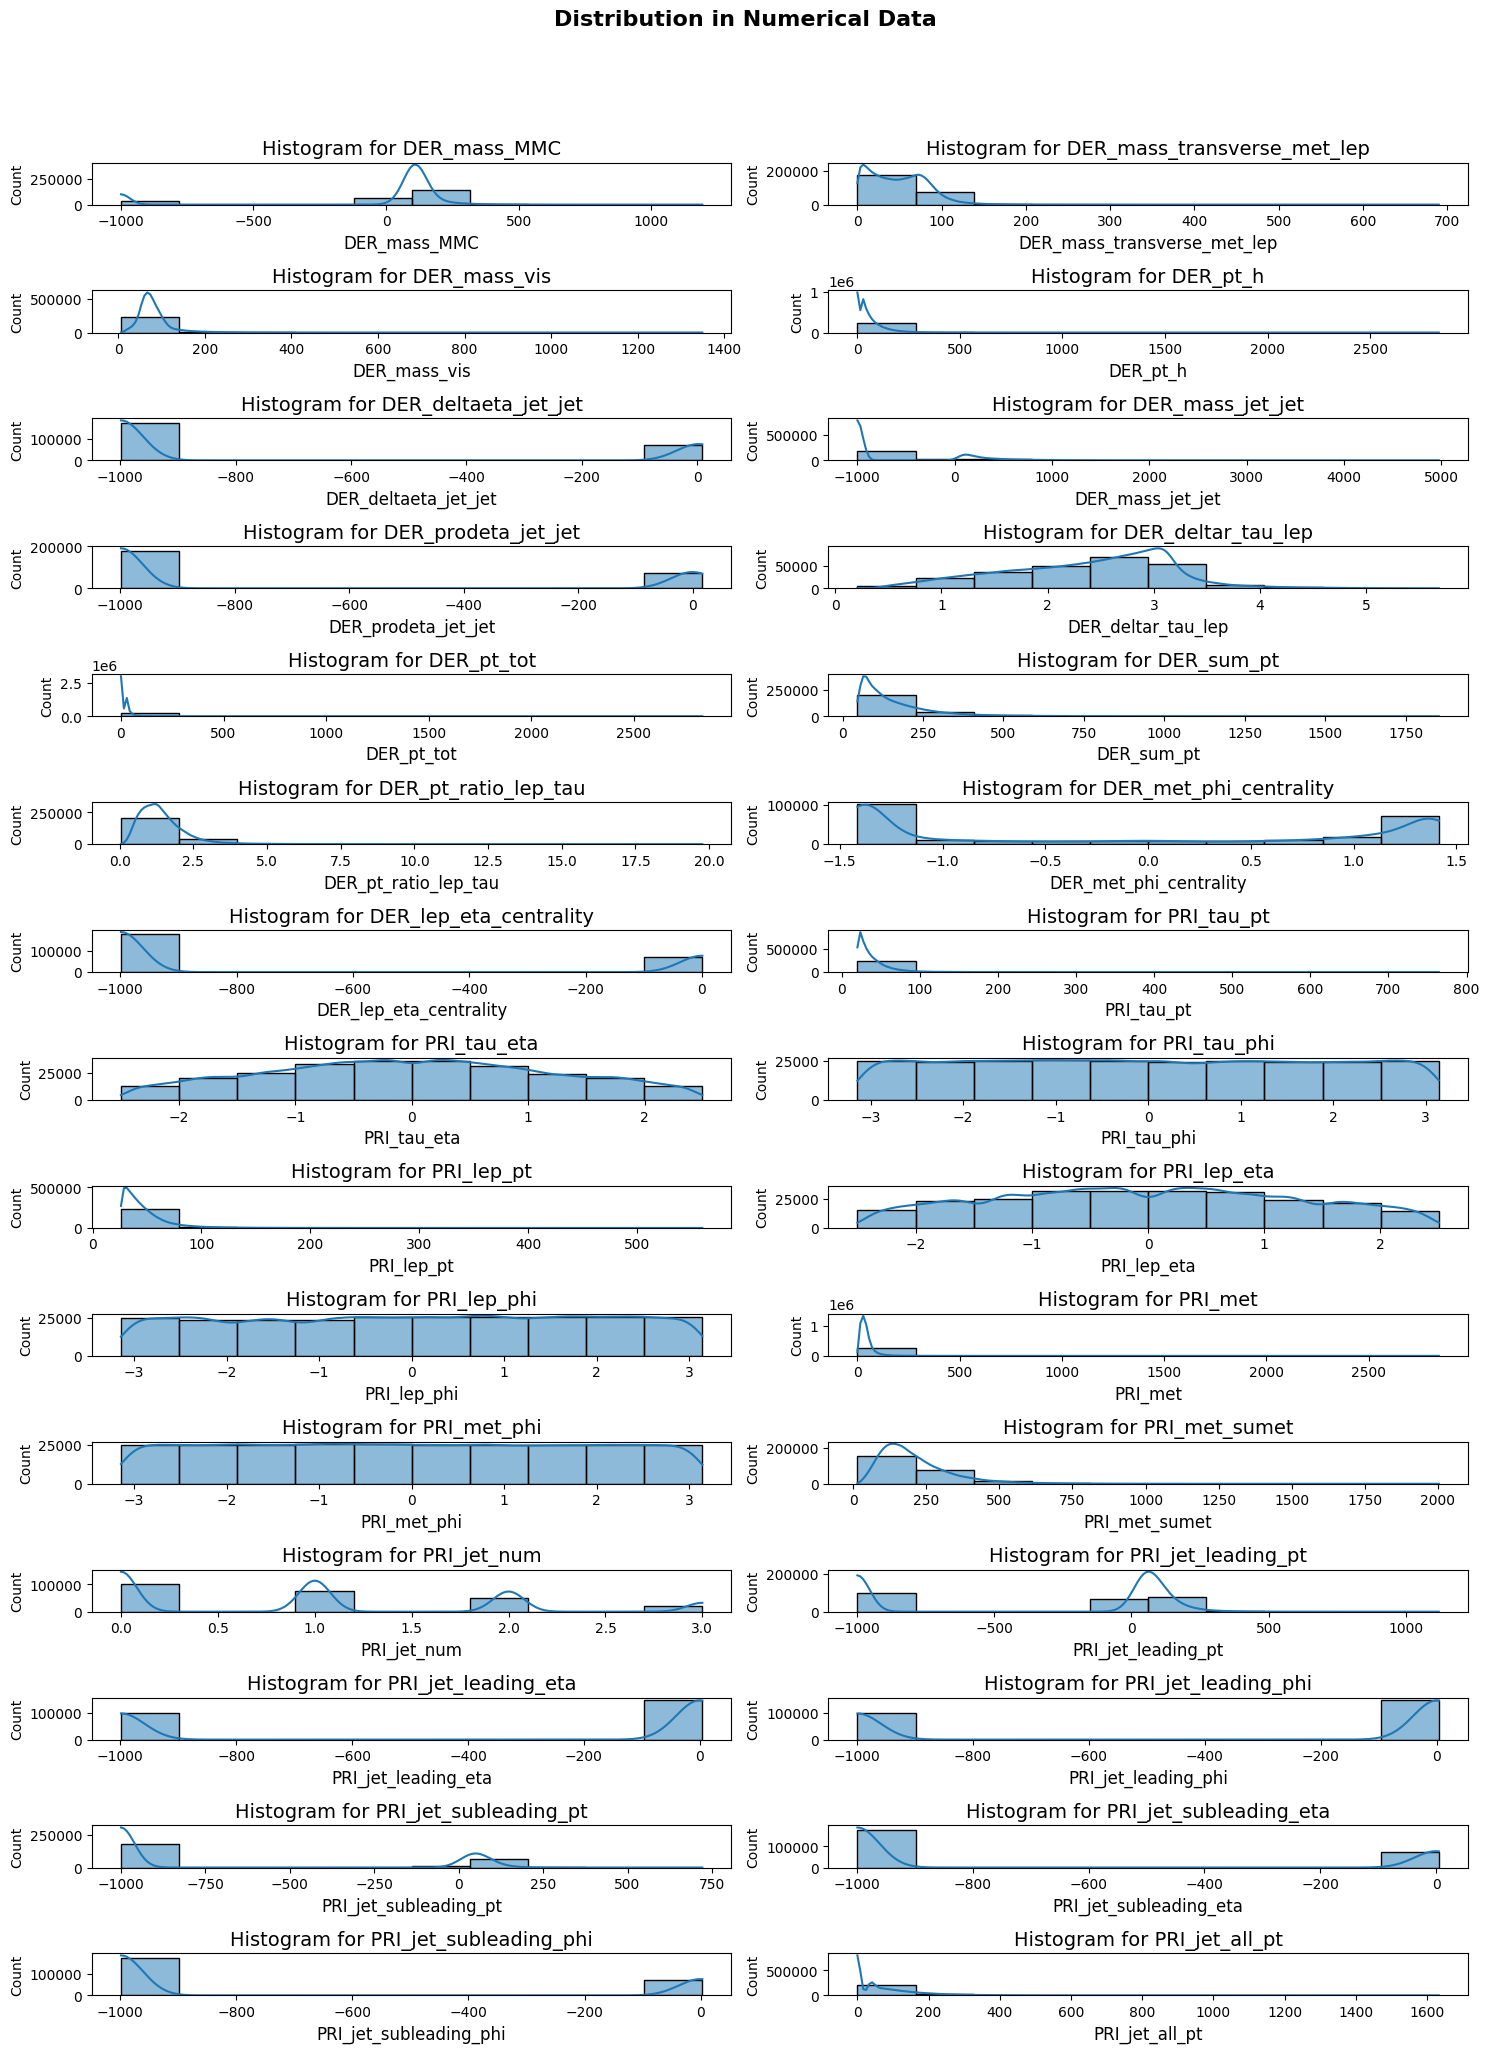

In [17]:
plt.figure(figsize=(15, 40))

for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.suptitle("Distribution in Numerical Data", fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
sentinel = -999
sentinel_counts = {}
for col in col_names:
    if df[col].dtype in ['float64', 'int64']:
        count = (df[col] == sentinel).sum()
        if count > 0:
            sentinel_counts[col] = {
                'count': count,
                'percentage' : (count / len(df)) * 100
            }
print(sentinel_counts)

{'DER_mass_MMC': {'count': 38114, 'percentage': 15.245600000000001}, 'DER_deltaeta_jet_jet': {'count': 177456, 'percentage': 70.9824}, 'DER_mass_jet_jet': {'count': 177457, 'percentage': 70.9828}, 'DER_prodeta_jet_jet': {'count': 177457, 'percentage': 70.9828}, 'DER_lep_eta_centrality': {'count': 177457, 'percentage': 70.9828}, 'PRI_jet_leading_pt': {'count': 99913, 'percentage': 39.9652}, 'PRI_jet_leading_eta': {'count': 99913, 'percentage': 39.9652}, 'PRI_jet_leading_phi': {'count': 99913, 'percentage': 39.9652}, 'PRI_jet_subleading_pt': {'count': 177457, 'percentage': 70.9828}, 'PRI_jet_subleading_eta': {'count': 177457, 'percentage': 70.9828}, 'PRI_jet_subleading_phi': {'count': 177457, 'percentage': 70.9828}}


In [19]:
sentinel_values_df = pd.DataFrame(sentinel_counts).T.sort_values('percentage', ascending=False)
display(sentinel_values_df)

,count,percentage
DER_mass_jet_jet,177457.0,70.9828
DER_prodeta_jet_jet,177457.0,70.9828
DER_lep_eta_centrality,177457.0,70.9828
PRI_jet_subleading_pt,177457.0,70.9828
PRI_jet_subleading_eta,177457.0,70.9828
PRI_jet_subleading_phi,177457.0,70.9828
DER_deltaeta_jet_jet,177456.0,70.9824
PRI_jet_leading_pt,99913.0,39.9652
PRI_jet_leading_eta,99913.0,39.9652
PRI_jet_leading_phi,99913.0,39.9652


Existe una significativa cantidad de valores -999 en columnas relativas a jets, debido a que no en todos los eventos se presentan los suficientes.

In [20]:
cols_to_clean = [col for col in col_names if col not in ['EventId', 'Weight', 'Label']]
df[cols_to_clean] = df[cols_to_clean].replace(-999,np.nan)
print(df[cols_to_clean].isna().sum())

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

**Es fundamental separar las columnas por estrategia en el contexto del problema físico**

In [21]:
jet_cols = [col for col in col_names if 'jet' in col.lower() and col != 'PRI_jet_num']
other_cols = [col for col in col_names if col not in jet_cols]

#### Inputar con 0 para variables de jets (debido a su ausencia)

In [22]:
from sklearn.impute import SimpleImputer
imputer_zero = SimpleImputer(strategy='constant', fill_value=0)
df[jet_cols] = imputer_zero.fit_transform(df[jet_cols])

#### Imputar con mediana para resto de variables

In [23]:
imputer_median = SimpleImputer(strategy='median')
df[other_cols] = imputer_median.fit_transform(df[other_cols])

In [24]:
print(f"Rest of missing values: {df[cols_to_clean].isna().sum().sum()}")

Rest of missing values: 0


### Outlier search

In [25]:
print(round(df[col_names].describe()),2)

        EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
count  250000.0      250000.0                     250000.0      250000.0   
mean   225000.0         120.0                         49.0          81.0   
std     72169.0          53.0                         35.0          41.0   
min    100000.0           9.0                          0.0           6.0   
25%    162500.0          96.0                         19.0          59.0   
50%    225000.0         112.0                         47.0          74.0   
75%    287499.0         131.0                         74.0          92.0   
max    349999.0        1192.0                        690.0        1349.0   

       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
count  250000.0              250000.0          250000.0             250000.0   
mean       58.0                   1.0             108.0                 -0.0   
std        64.0                   1.0             273.0                  2.

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')


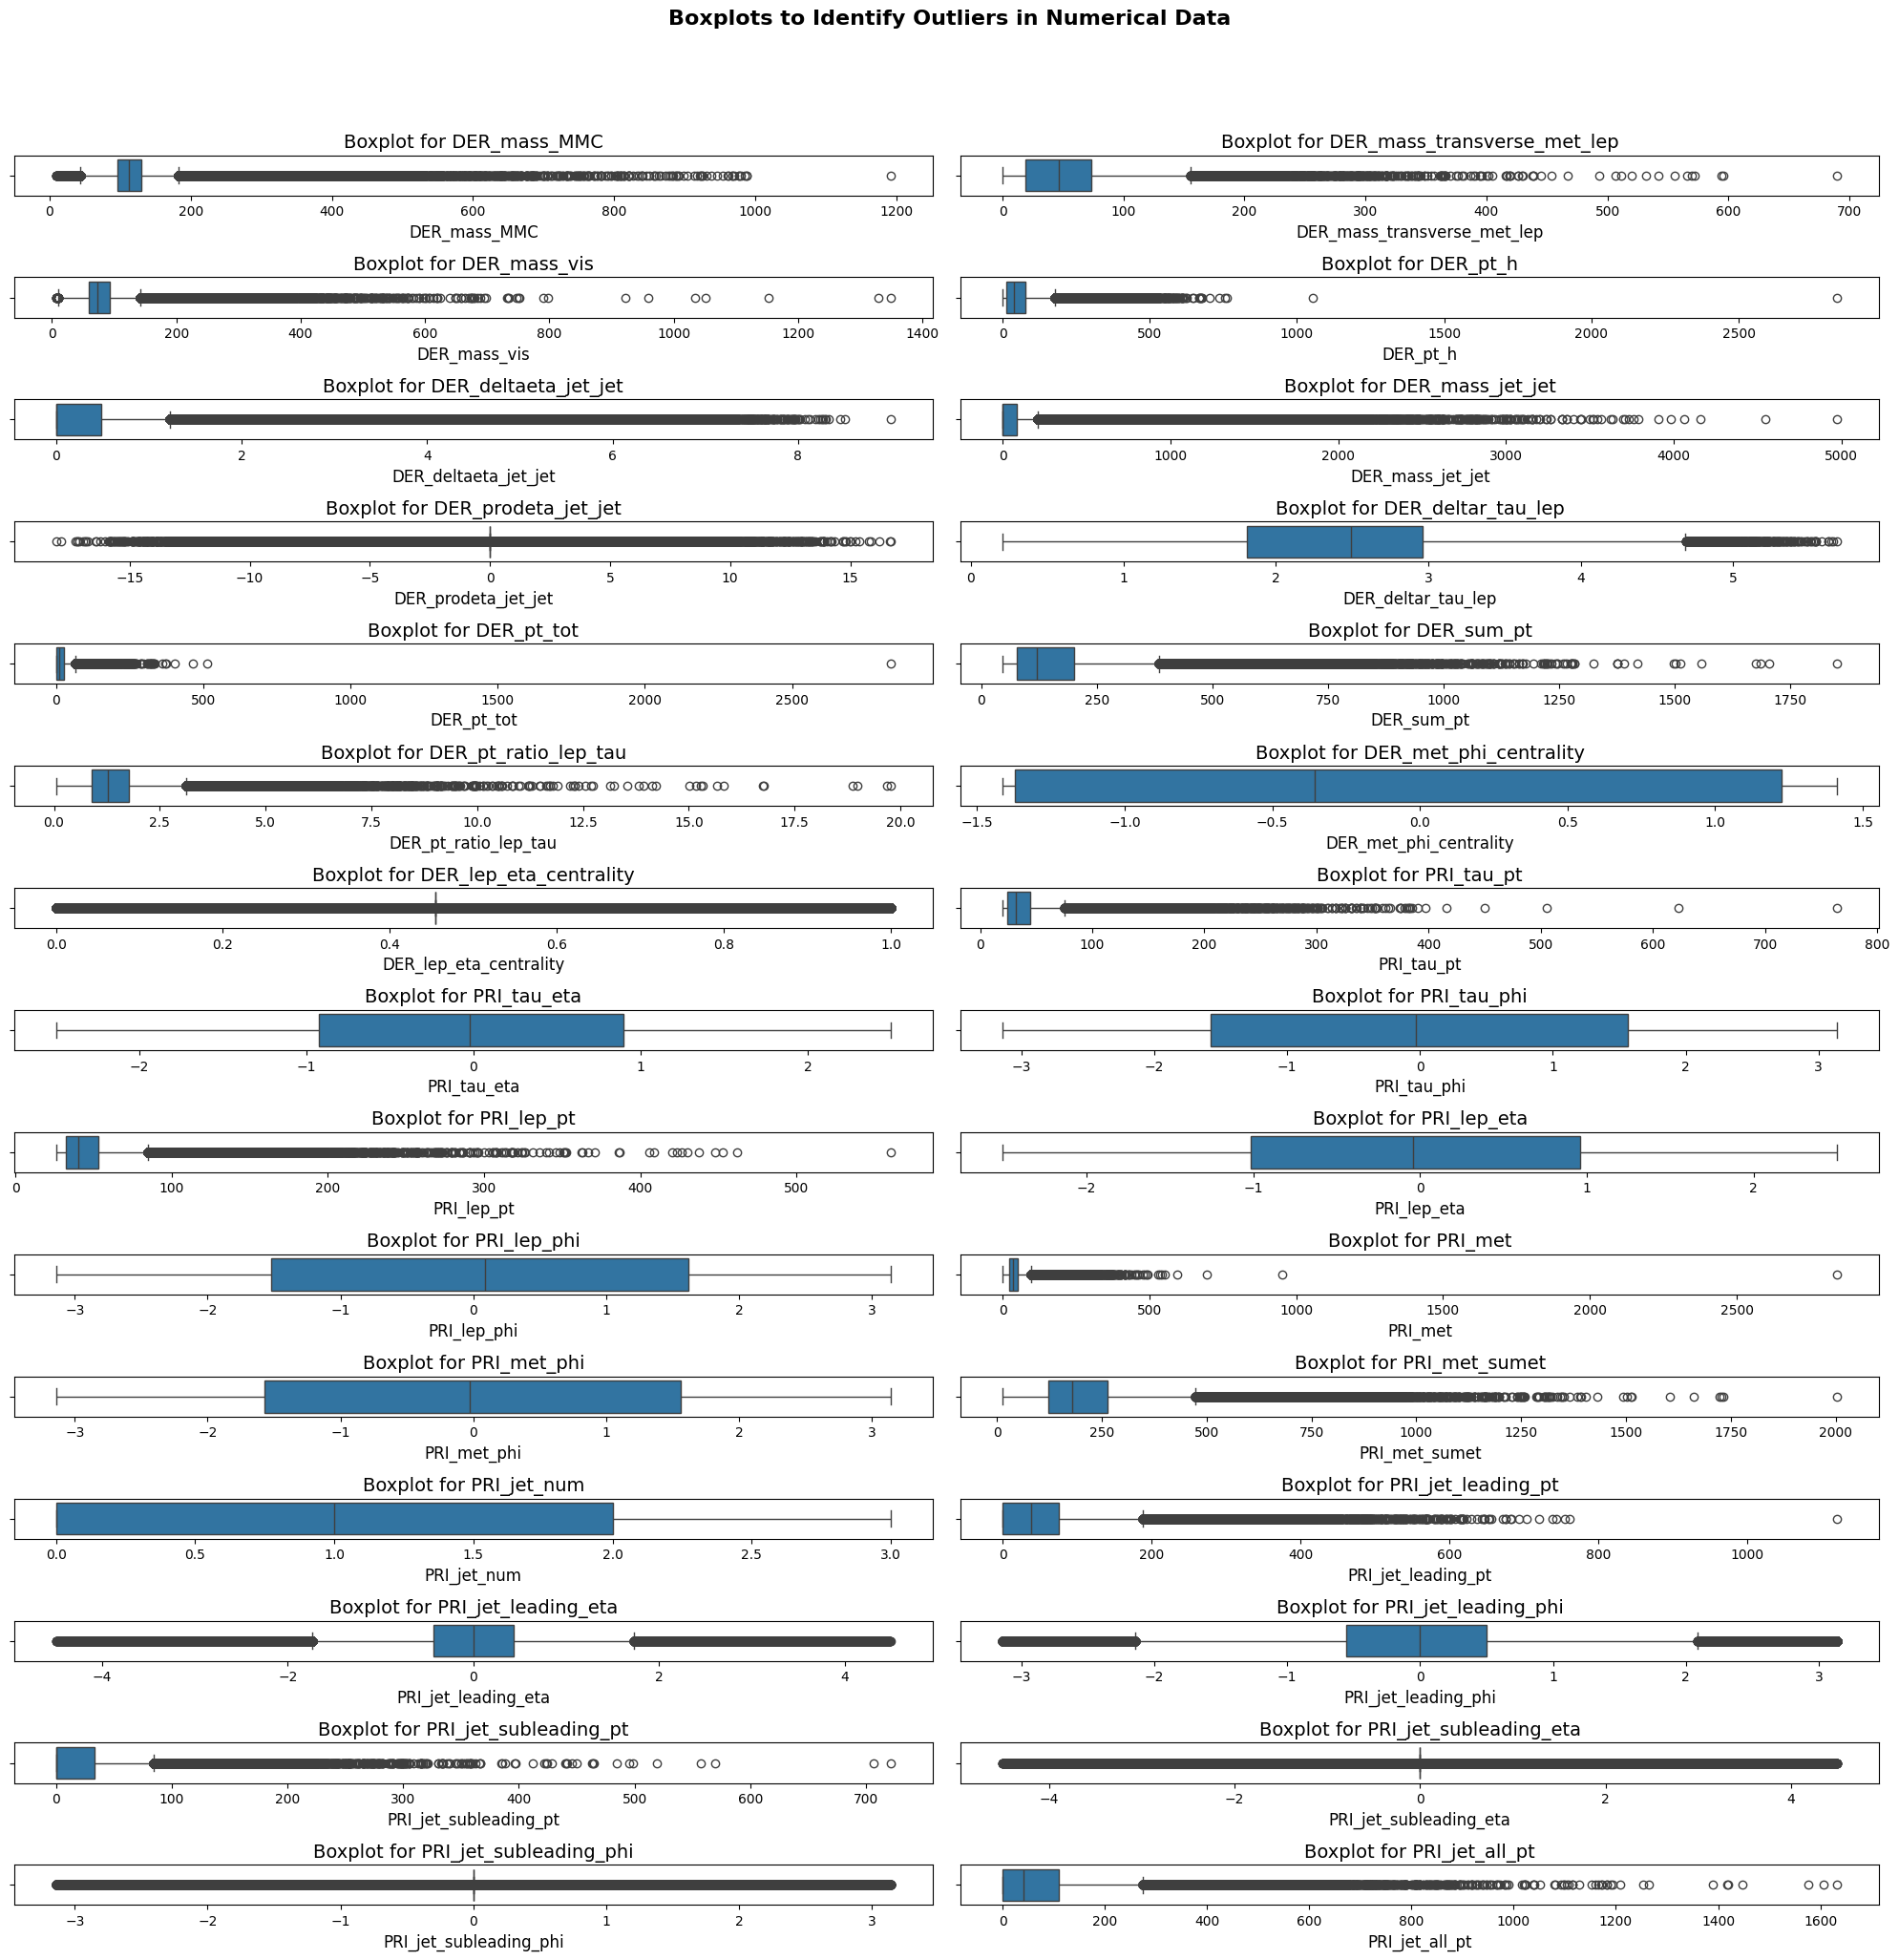

In [26]:
numer_cols = col_names[1:-2]
print(numer_cols)
plt.figure(figsize=(20, 40))

for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

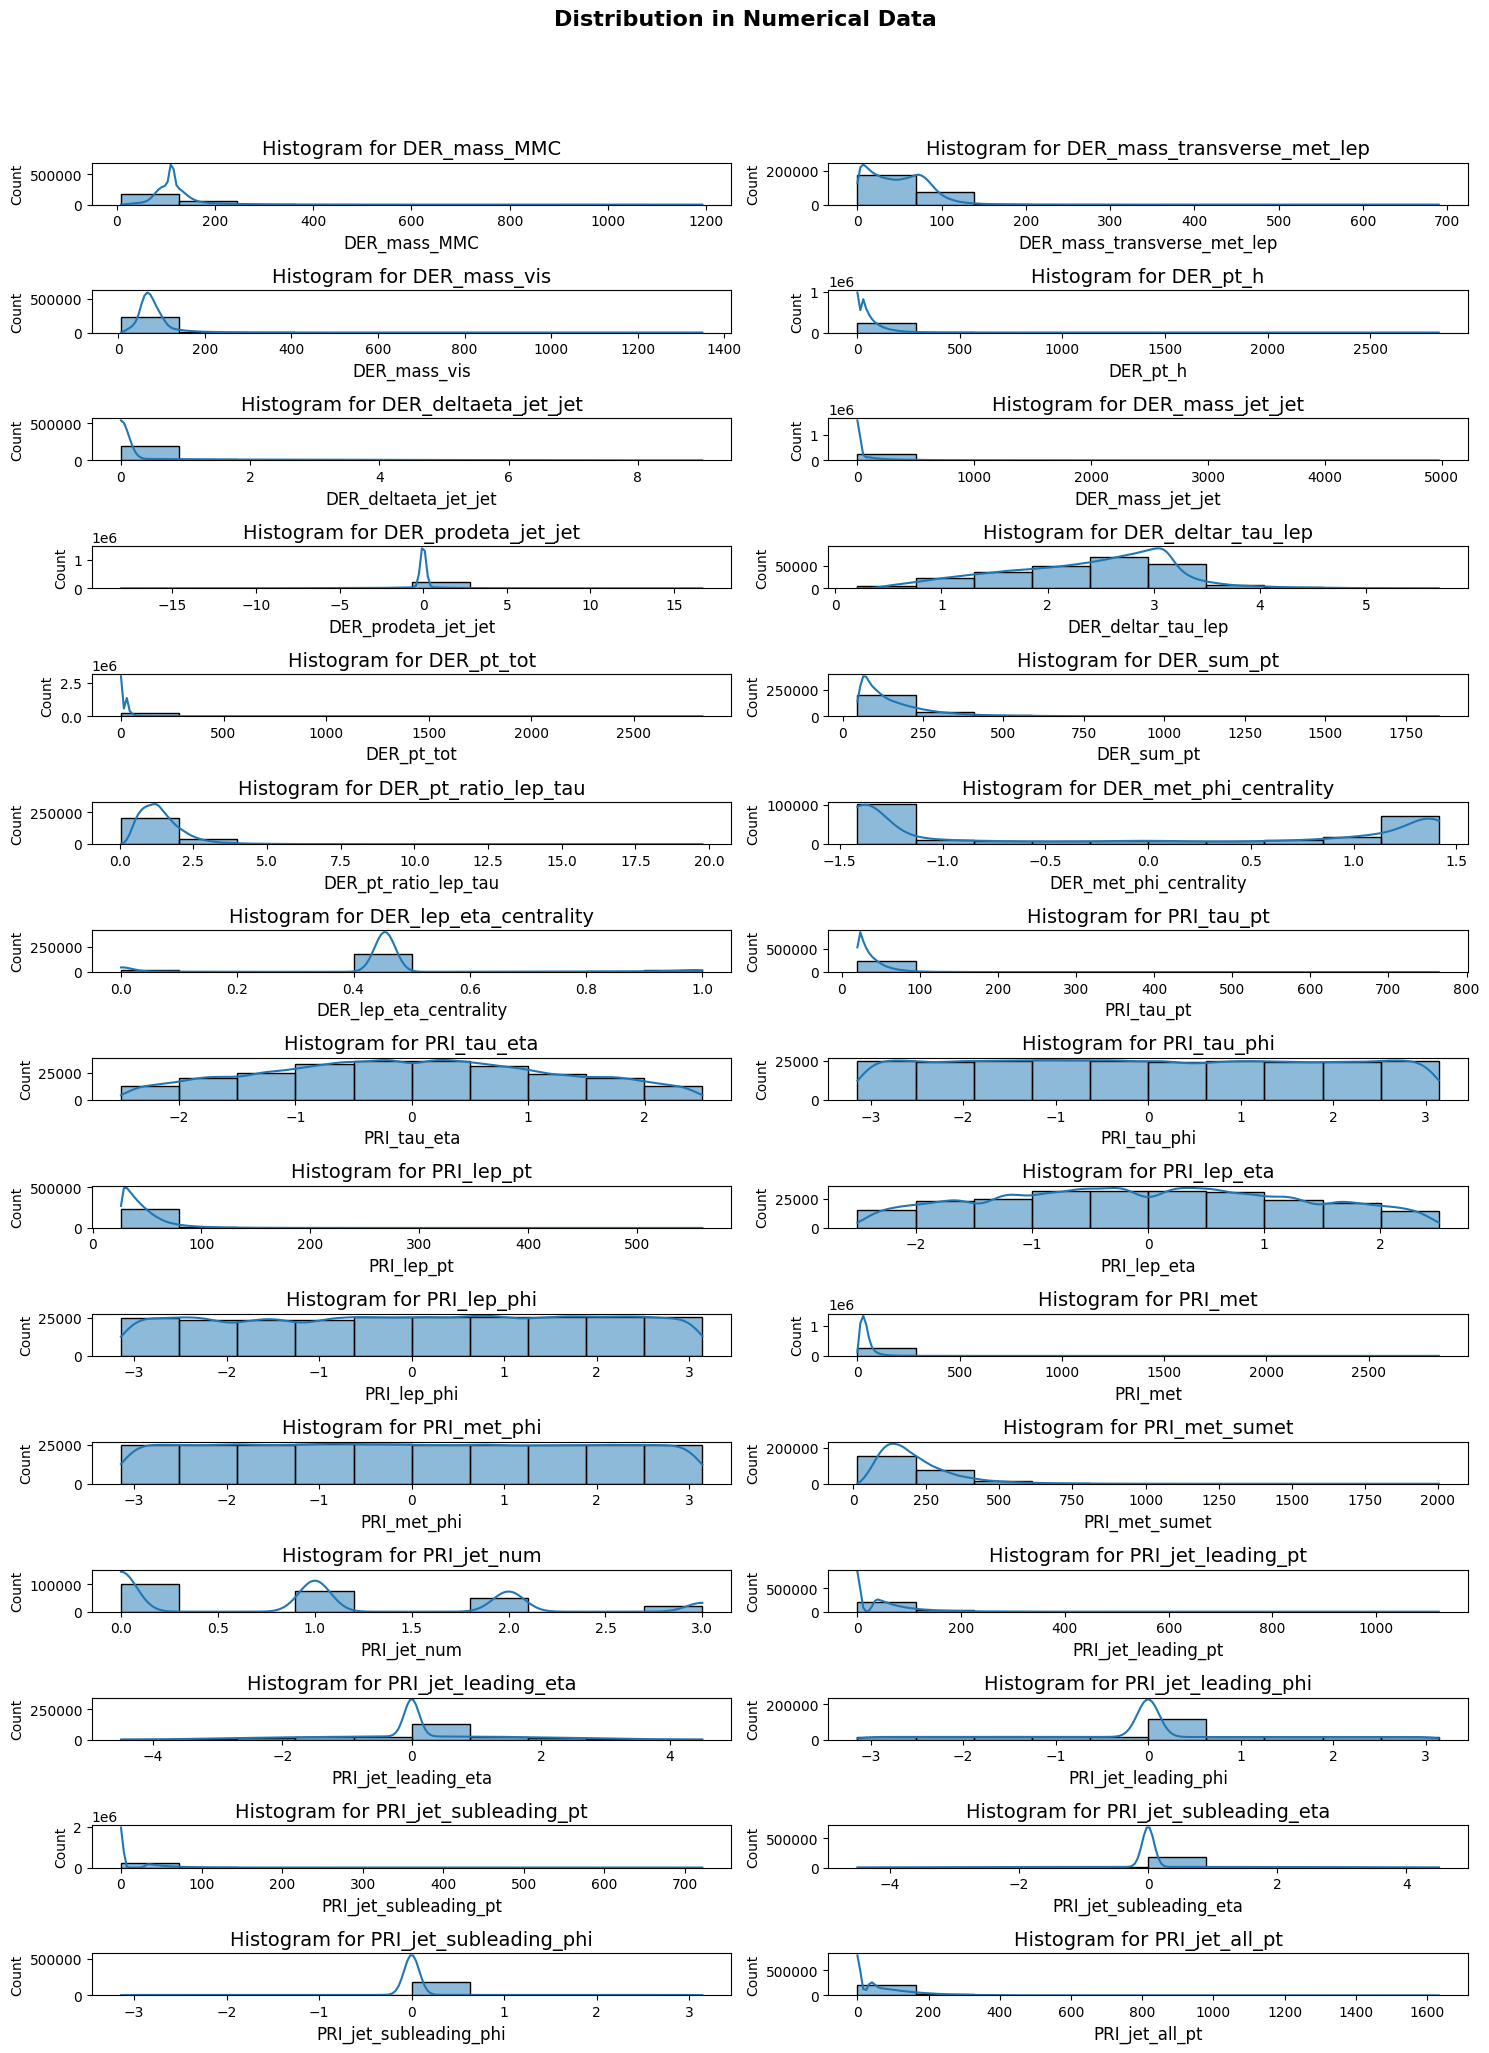

In [27]:
plt.figure(figsize=(15, 40))

for i, col in enumerate(numer_cols, 1):
    plt.subplot(len(numer_cols), 2, i)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.suptitle("Distribution in Numerical Data", fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Outlier Search
Es fundamental considerar que dado el contexto de este problema, existen valores cuyos outliers NO deben eliminarse

In [28]:
from scipy.stats.mstats import winsorize

In [29]:
no_winsorize = [
    # Mases - may have legitimate broad ranges 
    'DER_mass_MMC',
    'DER_mass_transverse_met_lep',
    'DER_mass_vis',
    'DER_mass_jet_jet',
    # Cross momentum  - high energy events are real
    'DER_pt_h',
    'DER_pt_tot',
    'DER_sum_pt',
    'PRI_tau_pt',
    'PRI_lep_pt',
    'PRI_jet_leading_pt',
    'PRI_jet_subleading_pt',
    'PRI_jet_all_pt',
    # Missing energy - may be high naturraly
    'PRI_met',
    'PRI_met_sumet'
]
conservative_winsorize = {
    # Solo ángulos phi (tienen límites físicos estrictos)
    'PRI_tau_phi': {'lower': 0.0005, 'upper': 0.0005},
    'PRI_lep_phi': {'lower': 0.0005, 'upper': 0.0005},
    'PRI_met_phi': {'lower': 0.0005, 'upper': 0.0005},
    'PRI_jet_leading_phi': {'lower': 0.0005, 'upper': 0.0005},
    'PRI_jet_subleading_phi': {'lower': 0.0005, 'upper': 0.0005},
}

winsorize_candidates = {
    **conservative_winsorize,
    'PRI_tau_eta': {'lower': 0.002, 'upper': 0.002},
    'PRI_lep_eta': {'lower': 0.002, 'upper': 0.002},
}


In [30]:
df_winsorized = df.copy()
winsorize_report = []

for feature, limits in winsorize_candidates.items():
    if feature in df_winsorized.columns:
        original = df_winsorized[feature].copy()
        
        df_winsorized[feature] = winsorize(
            df_winsorized[feature],
            limits=(limits['lower'], limits['upper'])
        )
        
        modified = (original != df_winsorized[feature]).sum()
        modified_pct = (modified / len(df)) * 100
        
        winsorize_report.append({
            'Feature': feature,
            'Original_Min': original.min(),
            'Original_Max': original.max(),
            'Winsorized_Min': df_winsorized[feature].min(),
            'Winsorized_Max': df_winsorized[feature].max(),
            'Values_Modified': modified,
            'Modified_%': modified_pct
        })

winsorize_report_df = pd.DataFrame(winsorize_report)

display(winsorize_report_df.sort_values('Modified_%', ascending=False))

,Feature,Original_Min,Original_Max,Winsorized_Min,Winsorized_Max,Values_Modified,Modified_%
6,PRI_lep_eta,-2.505,2.503,-2.438,2.440,988,0.3952
5,PRI_tau_eta,-2.499,2.497,-2.444,2.444,973,0.3892
4,PRI_jet_subleading_phi,-3.142,3.142,-3.131,3.131,244,0.0976
0,PRI_tau_phi,-3.142,3.142,-3.138,3.137,241,0.0964
3,PRI_jet_leading_phi,-3.142,3.141,-3.136,3.135,227,0.0908
2,PRI_met_phi,-3.142,3.142,-3.138,3.138,221,0.0884
1,PRI_lep_phi,-3.142,3.142,-3.139,3.138,214,0.0856


## Train / Test Dataset Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
non_feature_cols = ['EventId', 'Weight', 'Label']
feature_cols = [col for col in col_names if col not in non_feature_cols]
print(f"Features: {feature_cols}")

Features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


In [33]:
X = df_winsorized[feature_cols].copy()
y = df_winsorized['Label'].copy()
weights = df_winsorized['Weight'].copy()
event_ids = df_winsorized['EventId'].copy()

In [34]:
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, weights,
    test_size=0.2,
    random_state=67,
    stratify=y
)

print(f"Train set size {X_train.shape}")
print(f"Train distribution: {y_train.value_counts(normalize=True)}")
print(f"Test set size {X_test.shape}")
print(f"Test distribution: {y_test.value_counts(normalize=True)}")

Train set size (200000, 30)
Train distribution: Label
0.0    0.65733
1.0    0.34267
Name: proportion, dtype: float64
Test set size (50000, 30)
Test distribution: Label
0.0    0.65734
1.0    0.34266
Name: proportion, dtype: float64


## Normailización

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=feature_cols,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=feature_cols,
    index=X_test.index
)

In [37]:
verifying_values = ['DER_mass_MMC', 'PRI_tau_pt', 'PRI_met']
print(f"Before normalization (train):\n {X_train[verifying_values].describe()}")
print('\n')
print(f"After normalization (train):\n {X_train_scaled[verifying_values].describe()}")

Before normalization (train):
         DER_mass_MMC     PRI_tau_pt        PRI_met
count  200000.000000  200000.000000  200000.000000
mean      120.423229      38.680026      41.734784
std        52.821882      22.333667      33.067117
min         9.044000      20.000000       0.155000
25%        95.693000      24.587000      21.408000
50%       112.406000      31.763500      34.813000
75%       130.572000      45.007250      51.864250
max      1192.026000     622.862000    2842.617000


After normalization (train):
        DER_mass_MMC    PRI_tau_pt       PRI_met
count  2.000000e+05  2.000000e+05  2.000000e+05
mean  -1.263523e-16 -7.682743e-17 -2.031086e-16
std    1.000003e+00  1.000003e+00  1.000003e+00
min   -2.108586e+00 -8.364087e-01 -1.257439e+00
25%   -4.681827e-01 -6.310232e-01 -6.147144e-01
50%   -1.517789e-01 -3.096913e-01 -2.093258e-01
75%    1.921324e-01  2.833050e-01  3.063313e-01
max    2.028715e+01  2.615708e+01  8.470316e+01


In [40]:
print(f"Median: {X_train_scaled.mean().mean():.8f}") # Should be close to 0
print(f"Std: {X_train_scaled.std().mean():.8f}") # Should be close to 1

Median: -0.00000000
Std: 1.00000250


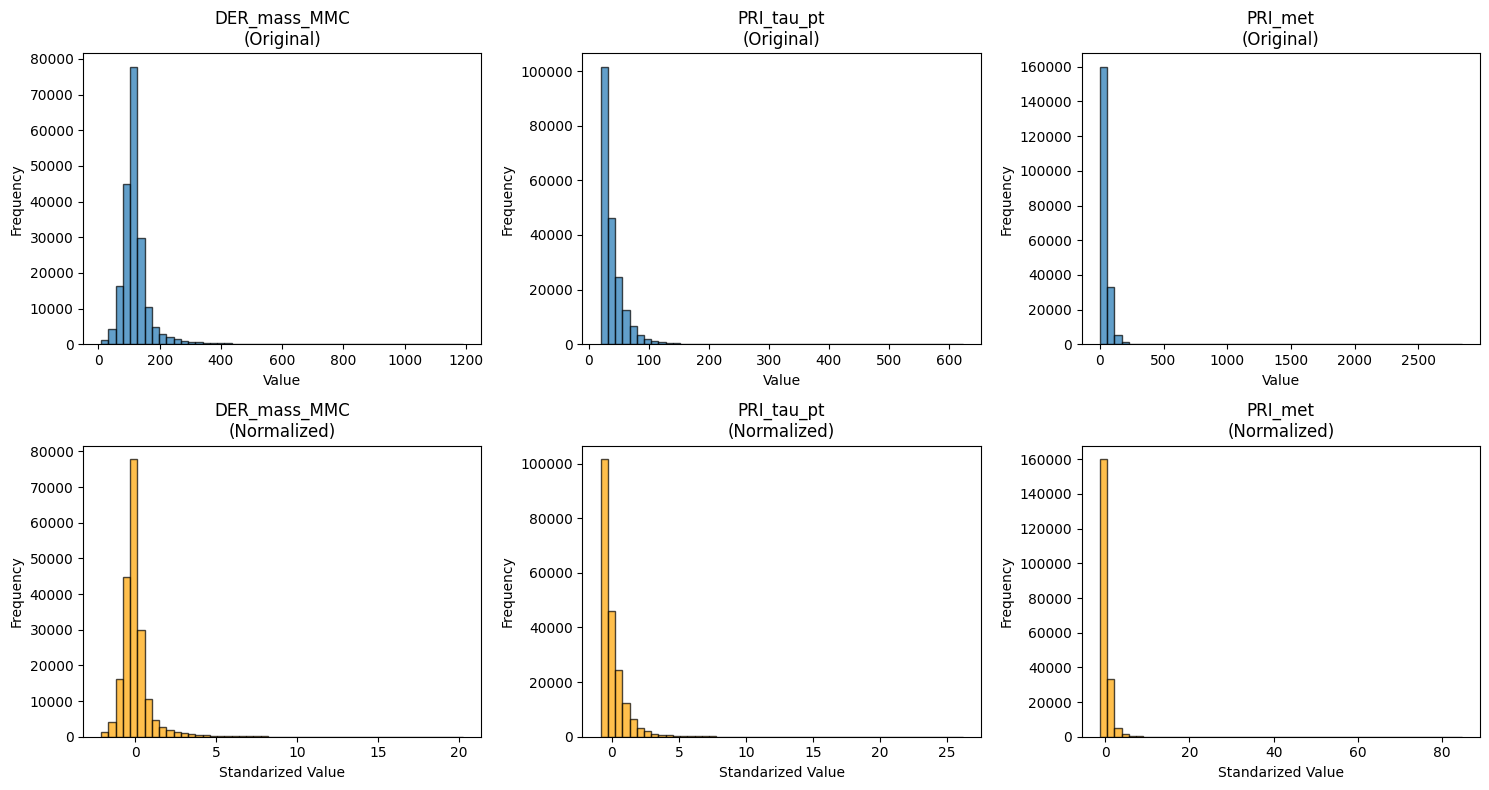

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(verifying_values):
    axes[0, idx].hist(X_train[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{feature}\n(Original)')
    axes[0, idx].set_xlabel('Value')
    axes[0, idx].set_ylabel('Frequency')
    
    axes[1, idx].hist(X_train_scaled[feature], bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1, idx].set_title(f'{feature}\n(Normalized)')
    axes[1, idx].set_xlabel('Standarized Value')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()